# TEQUILA Feasibility Study

We estimate the signal-to-noise radio for the intensity $I$ for an unpolarized source observed with the proposed TEQUILA polarimeter for COLIBRÍ.


## Assumptions

Our assumptions are:

- TEQUILA will use a microgrid CMOS device like the Sony IMX250MZR/IMX253MZR with 3.45 micron pixels with a fixed $r$ filter and be mounted in place of the OGSE.

- The camera will likely be the [SVS-Vistek exo253Z](https://www.svs-vistek.com/svs-main/q-web/q-web-functions/_svs-download-file.php?s=0&f=312188326eb64ac312a6c49157b51c23) ; [Software Linux AMD64](https://www.svs-vistek.com/svs-main/q-web/q-web-functions/_svs-download-file.php?s=8&f=L0xpbnV4L2FtZDY0L1NWQ2FtX0tpdF92Mi41LjE1X1NldHVwX0FNRDY0X0xpbnV4LnppcA==) ; [Manual](https://www.svs-vistek.com/svs-main/q-web/q-web-functions/_svs-download-file.php?s=0&f=manual_svcam_exo174_gige_preliminarypdf-325)




- Spectral response
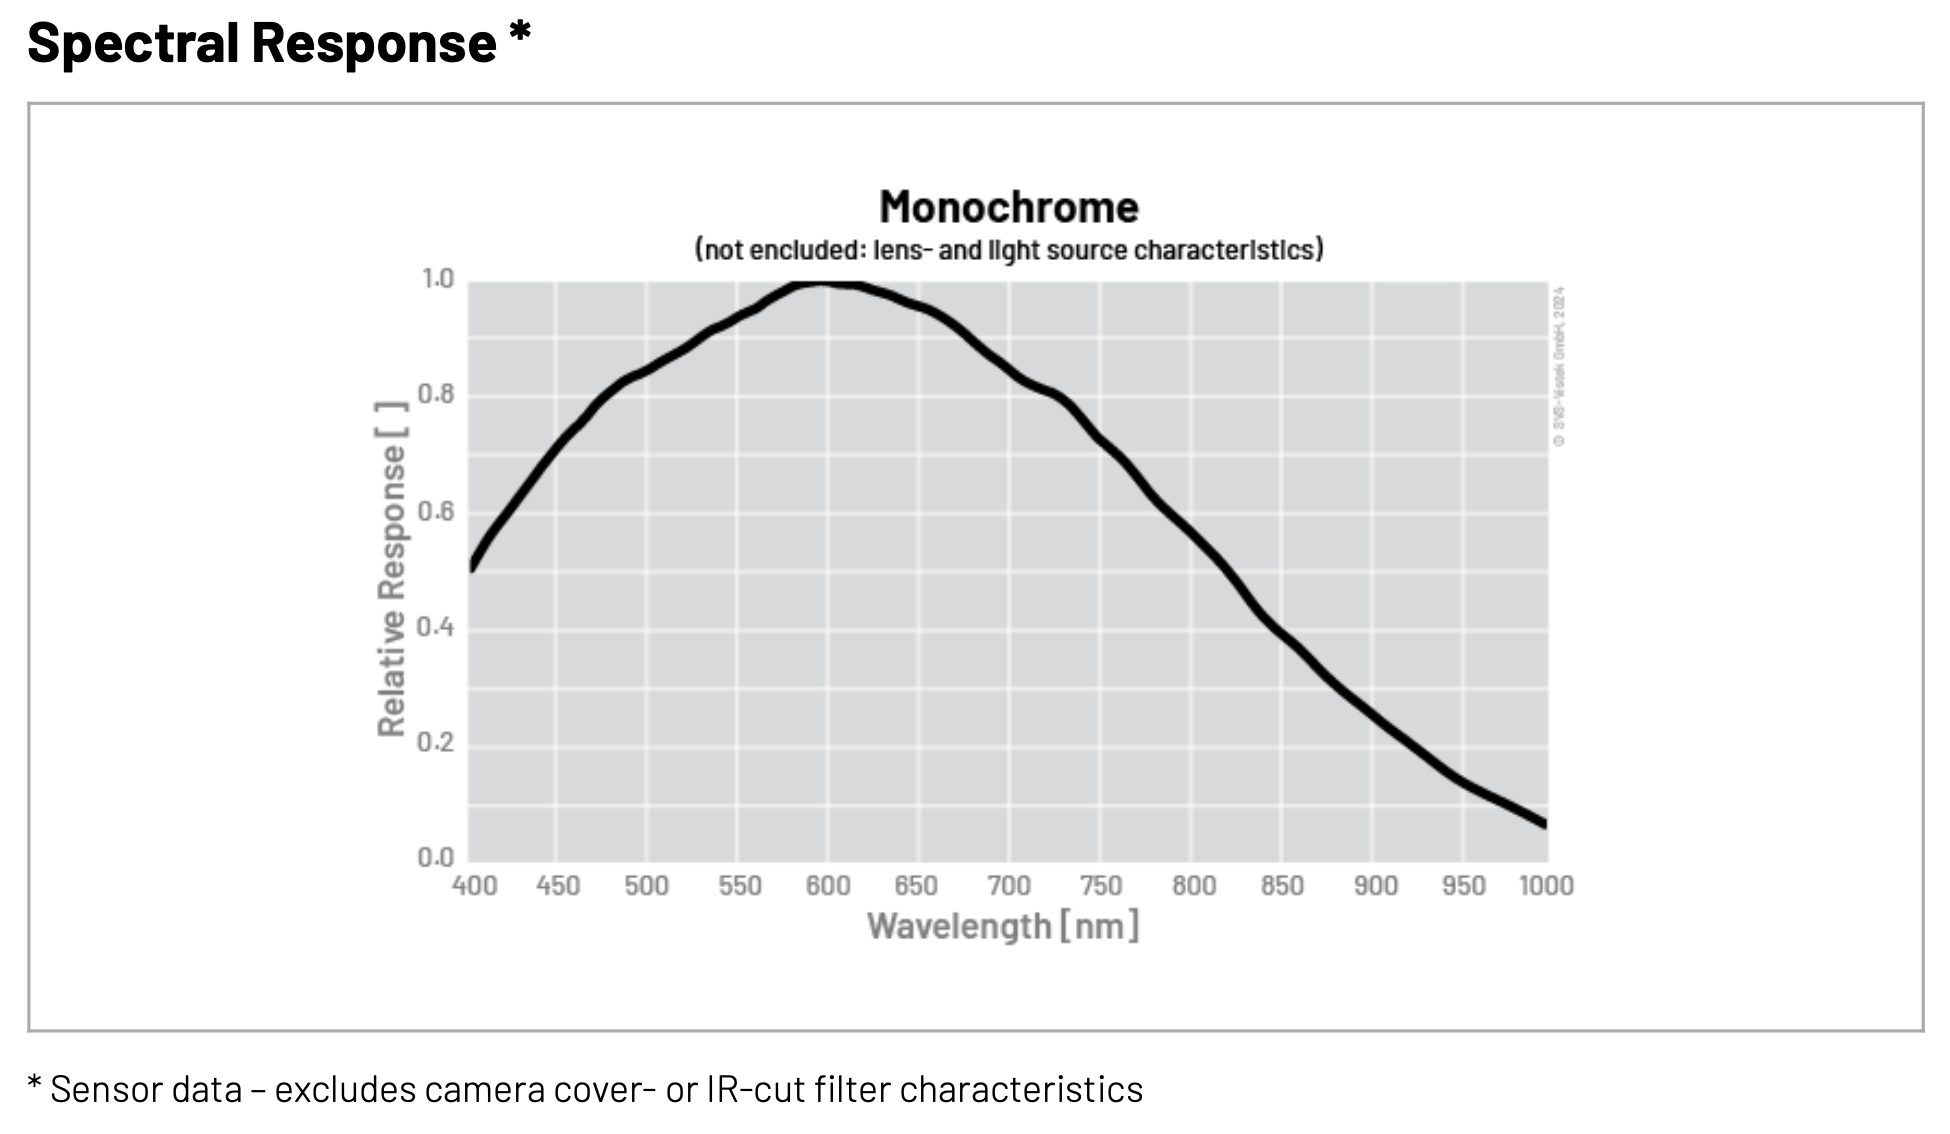

- Quantum efficiency plot
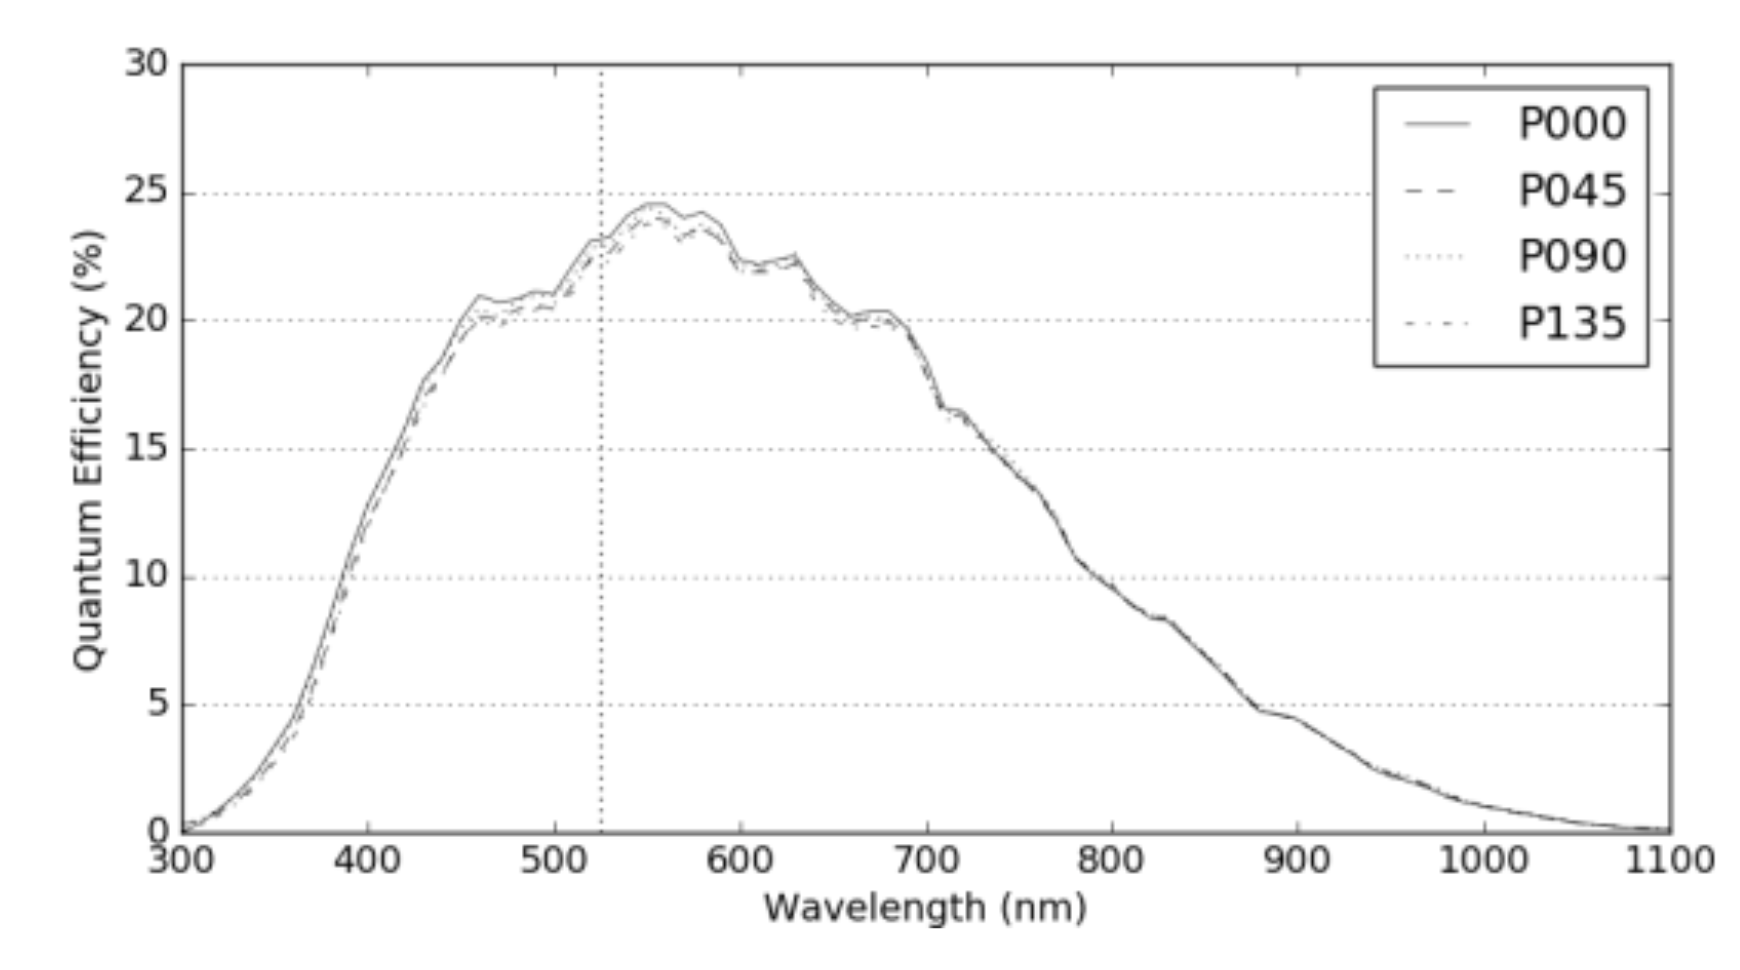

- The system efficiency for unpolarized light is 22% of that of DDRAGO (where the factor of one half comes from the polarimeter). The zero-point for DDRAGO in $r$ is about 6.5e9 e/s.

- The dark current is 2.1 e/s/pixel. We can subtract the mean dark current perfectly, so the only impact of dark current is its shot noise.

- We ignore read noise.

- We ignore sky brightness.

-  The image quality if 1 arcsec FWHM. The FWHM contains approximately half the light and is approximately the optimum aperture diameter.

# Model

The zero-point $n$ in $r$ e/s, scaled from DDRAGO. The factor of 0.5 is for the grid polarimeter.

In [1]:
n = 0.35 * 6.5e9 #updated for QHY 70% QE * 0.5 = 35%

The dark current is $d$ in e/s/pixel

In [2]:
d = 0.017  #updated for QHY this is dark current at -20 degree

The pixel scale $p$ in arcsec/pixel, scaled from the OGSE which has 9 micron pixels and a pixel scale of 0.20 arcsec/pixel.

In [3]:
p = 0.20 * 3.45 / 9
print("%.3f" % p)

0.077


The FWHM is $w$ in arcsec

In [4]:
w = 1.0

For a source with a flux density in $r$ of $f F_0$, in which $F_0$ is the flux density for a zero-magnitude source, the signal $n$ in an exposure time $t$ is
$$
N = 0.5 nft,
$$
in which the factor of 0.5 comes from having only half of the light in the aperture.

The number of pixels $P$ in the aperture is
$$
P = 0.25 * \pi * (w/p)^2.
$$
The total dark signal in the aperture is
$$
D = Pdt.
$$

The signal-to-noise ratio $R$ is then
$$
R = \frac{N}{(N + D)^{1/2}}.
$$

In [5]:
import numpy as np

def R(m, t):
    f = 10 ** (-0.4 * m)
    N = 0.5 * n * f * t
    P = 0.25 * np.pi * (w / p) ** 2
    D = P * d * t
    return N / np.sqrt(N + D)

# Results

Now we will consider the SNR in a 60-second as a function of $r$ magnitude.

We see than SNR = 100 requires a source brighter than 17 mag for 60-second. For 120-second it will reach 18.

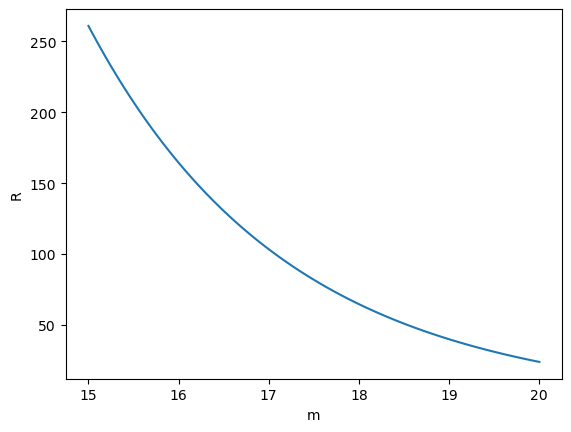

15.0 261
16.0 164
16.5 130
17.0 103
18.0 65
19.0 40
20.0 24


In [6]:
import matplotlib.pyplot as plt

m = np.linspace(15, 20, 100)
t = 60
plt.plot(m, R(m, t))
plt.xlabel('m')
plt.ylabel('R')
plt.show()

for m in [15, 16, 16.5, 17, 18, 19, 20]:
    print("%.1f %.0f" % (m, R(m, t)))